<a href="https://colab.research.google.com/github/yosaarya/Data-Mining-A11.4623/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Menggunakan data dari Students Performance

In [2]:
dataset = pd.read_csv('StudentsPerformance.csv')
x = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:, -4].values

In [3]:
print(x)

[[72 72]
 [69 90]
 [90 95]
 [47 57]
 [76 78]
 [71 83]
 [88 95]
 [40 43]
 [64 64]
 [38 60]
 [58 54]
 [40 52]
 [65 81]
 [78 72]
 [50 53]
 [69 75]
 [88 89]
 [18 32]
 [46 42]
 [54 58]
 [66 69]
 [65 75]
 [44 54]
 [69 73]
 [74 71]
 [73 74]
 [69 54]
 [67 69]
 [70 70]
 [62 70]
 [69 74]
 [63 65]
 [56 72]
 [40 42]
 [97 87]
 [81 81]
 [74 81]
 [50 64]
 [75 90]
 [57 56]
 [55 61]
 [58 73]
 [53 58]
 [59 65]
 [50 56]
 [65 54]
 [55 65]
 [66 71]
 [57 74]
 [82 84]
 [53 55]
 [77 69]
 [53 44]
 [88 78]
 [71 84]
 [33 41]
 [82 85]
 [52 55]
 [58 59]
 [ 0 17]
 [79 74]
 [39 39]
 [62 61]
 [69 80]
 [59 58]
 [67 64]
 [45 37]
 [60 72]
 [61 58]
 [39 64]
 [58 63]
 [63 55]
 [41 51]
 [61 57]
 [49 49]
 [44 41]
 [30 26]
 [80 78]
 [61 74]
 [62 68]]


In [4]:
print(y)

[0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
print(x_train)

[[53 58]
 [75 90]
 [58 73]
 [62 68]
 [33 41]
 [18 32]
 [79 74]
 [62 61]
 [88 95]
 [82 85]
 [61 57]
 [76 78]
 [40 42]
 [88 78]
 [70 70]
 [40 52]
 [52 55]
 [69 73]
 [58 54]
 [63 65]
 [59 65]
 [39 39]
 [69 90]
 [56 72]
 [44 41]
 [50 53]
 [71 84]
 [54 58]
 [62 70]
 [82 84]
 [74 71]
 [81 81]
 [46 42]
 [72 72]
 [61 74]
 [69 75]
 [71 83]
 [ 0 17]
 [88 89]
 [77 69]
 [66 69]
 [49 49]
 [64 64]
 [78 72]
 [73 74]
 [50 64]
 [55 65]
 [57 56]
 [67 64]
 [58 59]
 [65 81]
 [58 63]
 [74 81]
 [65 75]
 [38 60]
 [30 26]
 [60 72]
 [59 58]
 [66 71]
 [50 56]]


In [9]:
print(x_test)

[[53 55]
 [67 69]
 [69 74]
 [80 78]
 [65 54]
 [63 55]
 [45 37]
 [61 58]
 [57 74]
 [39 64]
 [55 61]
 [69 80]
 [90 95]
 [41 51]
 [53 44]
 [97 87]
 [47 57]
 [44 54]
 [40 43]
 [69 54]]


In [10]:
print(y_train)

[0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0
 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0]


In [11]:
print(y_test)

[0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [13]:
print(x_train)

[[-0.45622173 -0.44843012]
 [ 0.87023793  1.55852987]
 [-0.15475363  0.49233237]
 [ 0.08642086  0.17874487]
 [-1.66209416 -1.51462762]
 [-2.56649848 -2.07908512]
 [ 1.11141242  0.55504987]
 [ 0.08642086 -0.26027762]
 [ 1.65405501  1.87211737]
 [ 1.29229328  1.24494237]
 [ 0.02612724 -0.51114762]
 [ 0.93053156  0.80591987]
 [-1.24003881 -1.45191012]
 [ 1.65405501  0.80591987]
 [ 0.56876983  0.30417987]
 [-1.24003881 -0.82473512]
 [-0.51651536 -0.63658262]
 [ 0.50847621  0.49233237]
 [-0.15475363 -0.69930012]
 [ 0.14671448 -0.00940762]
 [-0.09446001 -0.00940762]
 [-1.30033243 -1.64006262]
 [ 0.50847621  1.55852987]
 [-0.27534087  0.42961487]
 [-0.99886433 -1.51462762]
 [-0.6371026  -0.76201762]
 [ 0.62906345  1.18222487]
 [-0.39592811 -0.44843012]
 [ 0.08642086  0.30417987]
 [ 1.29229328  1.18222487]
 [ 0.80994431  0.36689737]
 [ 1.23199966  0.99407237]
 [-0.87827708 -1.45191012]
 [ 0.68935707  0.42961487]
 [ 0.02612724  0.55504987]
 [ 0.50847621  0.61776737]
 [ 0.62906345  1.11950737]
 

In [14]:
print(x_test)

[[-0.45631811 -0.48557843]
 [ 0.43096711  0.45860185]
 [ 0.55772214  0.79580909]
 [ 1.25487481  1.06557488]
 [ 0.30421208 -0.55301988]
 [ 0.17745704 -0.48557843]
 [-0.96333824 -1.6995245 ]
 [ 0.05070201 -0.28325408]
 [-0.20280805  0.79580909]
 [-1.34360334  0.12139461]
 [-0.32956308 -0.08092974]
 [ 0.55772214  1.20045778]
 [ 1.88864997  2.2120795 ]
 [-1.2168483  -0.75534422]
 [-0.45631811 -1.22743436]
 [ 2.33229258  1.67254792]
 [-0.83658321 -0.35069553]
 [-1.02671576 -0.55301988]
 [-1.28022582 -1.29487581]
 [ 0.55772214 -0.55301988]]


In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
y_pred = classifier.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  5]
 [ 2  1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


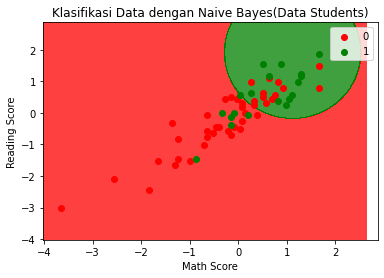

In [19]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i),label = j)
plt.title('Klasifikasi Data dengan Naive Bayes(Data Students)')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


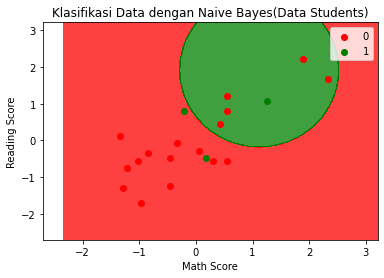

In [20]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i),label = j)
plt.title('Klasifikasi Data dengan Naive Bayes(Data Students)')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend()
plt.show()